In [1]:
import pandas as pd

BAF_data = pd.read_excel('BAFdata\\BAF.xlsx')
name_df = pd.read_excel('BAFdata\\name_replace.xlsx')

In [2]:
idc = dict(zip(name_df['old'],name_df['groups']))
lendc = dict(zip(name_df['old'],name_df['length']))

In [3]:
modeldata = BAF_data.copy()
lis = []
llis = []
for x in modeldata['Abbreviation']:
    if x in idc.keys():
        llis.append(lendc[x])
        lis.append(idc[x])
    else:
        lis.append(0)
        llis.append(0)
modeldata['groups'] = lis
modeldata['length'] = llis

In [4]:
md_1 =modeldata[(modeldata['groups']!=0)&(modeldata['Tissue']=='muscle')]

In [5]:
md_2 = modeldata[(modeldata['groups']!=0)&(modeldata['Tissue']=='whole')].copy()
_lis = []
for i in md_2.index:
    if md_2['groups'][i] =='PFCAs':
        _lis.append(md_2['BAF'][i]/2.5)
    elif md_2['groups'][i] == 'PFSAs':
        _lis.append(md_2['BAF'][i]/2.6)
    else:
        raise ValueError('')
md_2['BAF'] = _lis

In [6]:
df_combined = pd.concat([md_1, md_2], axis=0)

In [7]:
df_combined.to_csv('BAFdata/modeldata2.csv')

In [8]:
import pandas as pd
pfosori = pd.read_csv('PFOS_2019.csv')
pfosori.head(1)

,lon,lat,value
0,-18,-80,0.036995


In [9]:
pfos = pd.read_csv('PFOS2010_g_medianinit.csv',index_col=0)
pfos.head(1)

,lat,lon,value,moni_num,neighbor_pois,neighbor_values
0,79,-133,0.01129,0,"[(74, -133), (74, -136), (74, -135), (74, -134)]","[0.009483006816762504, 0.011893311833851509, 0..."


In [10]:
merged = pd.merge(pfosori[['lat', 'lon', 'value']], pfos[['lat', 'lon', 'value']], on=['lat', 'lon'], suffixes=('_ori', '_new'))
merged.head(1)

,lat,lon,value_ori,value_new
0,-80,-18,0.036995,0.028


In [11]:
merged.to_csv('PFOS-2019-ori-new.csv')

## 训练模型

In [1]:
from BAFmodel import model_cal
model = model_cal()

Feature Importance (based on SHAP values):
Concentration in environmental media(ng/L)    1.085055
Temperature(℃)                                1.031533
length                                        0.210825
trophic level                                 0.170624
Salinity (‰)                                  0.169921
Kow                                           0.126598
Protein (%)                                   0.119711
groups                                        0.071274
dtype: float64


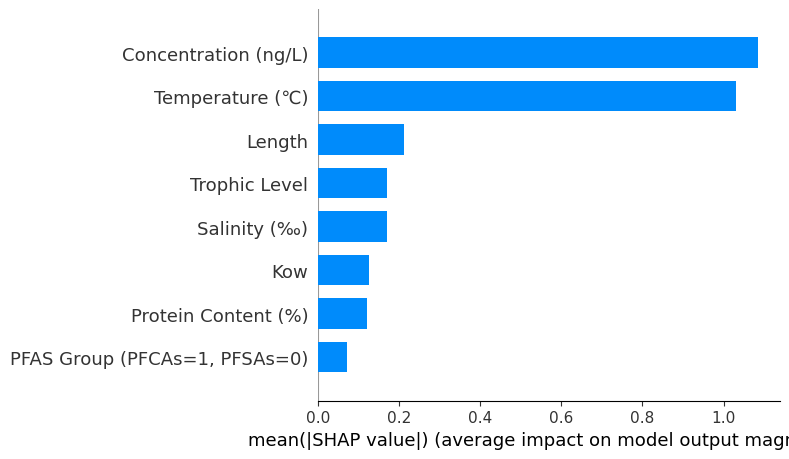

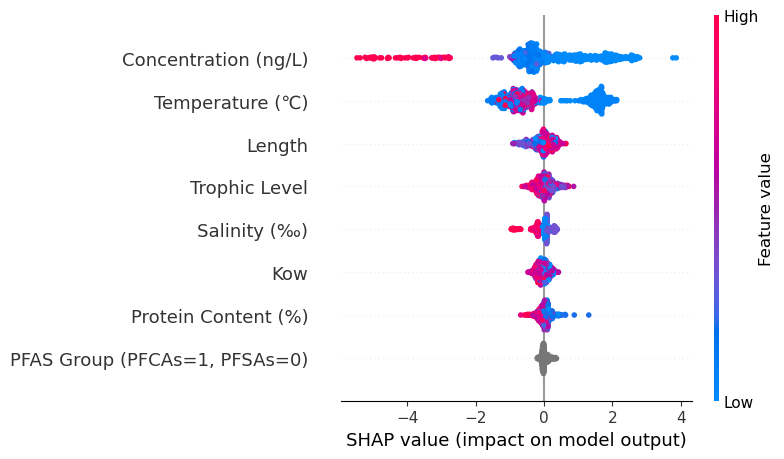

In [10]:
shap_df, feature_importance = model.calculate_shap_values()

In [3]:
# 假设 df 是一个新的 DataFrame，包含待预测的数据
df = pd.DataFrame({
    'Kow': [3.4, 4.0],
    'TL': [2.0, 2.2],
    'Protein': [12.5, 15.0],
    'Con': [100, 150],
    'salinity': [15.0, 18.0],
    'T_C': [22.0, 23.0],
    'Groups': ['PFCAs', 'PFSAs'],
    'Length': [20.0, 25.0]
})

# 批量预测数据
df_with_predictions = model.run_multiple_times_and_calculate_statistics(df)

# 输出带有预测结果和置信区间的 DataFrame
print(df_with_predictions[['pre_LNBAF', 'conf_interval_lower', 'conf_interval_upper']])


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]

   pre_LNBAF  conf_interval_lower  conf_interval_upper
0   2.501088             1.956300             3.045876
1   2.542555             1.978011             3.107098


In [14]:
import pandas as pd
pre_df = pd.read_csv('BAFdata\\BAF_NEW_DATA.csv')
# pre_df = pd.read_csv('BAFdata/merged_data.csv')

In [15]:
# pre_df = pd.read_csv('BAFdata/merged_data.csv')
pre_df_finish = model.run_multiple_times_and_calculate_statistics(pre_df)
pre_df_finish.describe()

100%|██████████| 100/100 [26:21<00:00, 15.82s/it]


,lat,lon,total_tonnes,kg,year,TL,Protein,salinity,T_C,Kow,Length,Con,pre_LNBAF,conf_interval_lower,conf_interval_upper
count,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06,4.714824e+06
mean,2.067363e+01,4.325456e+01,9.029858e+01,9.029858e+04,2.014355e+03,3.998262e+00,1.947341e+01,3.425303e+01,1.792738e+01,4.411043e+00,7.570498e+00,1.384198e+00,7.187762e+00,6.871371e+00,7.504153e+00
std,3.606583e+01,9.893040e+01,4.143735e+02,4.143735e+05,4.987385e+00,5.316322e-01,2.118179e+00,2.507585e+00,9.272663e+00,1.411578e+00,1.974438e+00,1.764053e+01,1.254805e+00,1.244355e+00,1.272184e+00
min,-5.800000e+01,-1.790000e+02,6.485800e-12,6.485800e-09,2.009000e+03,2.000000e+00,1.230000e+01,2.549000e+00,-1.894000e+00,1.820000e+00,4.000000e+00,3.000000e-05,-1.327532e+00,-1.527220e+00,-1.132115e+00
25%,-1.400000e+01,-4.500000e+01,1.028447e-01,1.028447e+02,2.009000e+03,3.700000e+00,1.800000e+01,3.321300e+01,1.018500e+01,3.480000e+00,6.000000e+00,8.559817e-03,6.511226e+00,6.225535e+00,6.815382e+00
50%,2.800000e+01,9.400000e+01,2.490477e+00,2.490477e+03,2.019000e+03,4.200000e+00,1.940000e+01,3.462200e+01,1.950600e+01,4.490000e+00,8.000000e+00,3.000000e-02,7.229118e+00,6.895964e+00,7.574412e+00
75%,5.200000e+01,1.300000e+02,2.548901e+01,2.548901e+04,2.019000e+03,4.400000e+00,2.070000e+01,3.551400e+01,2.683900e+01,5.480000e+00,9.000000e+00,1.350238e-01,8.168029e+00,7.793618e+00,8.523740e+00
max,8.200000e+01,1.800000e+02,3.438958e+04,3.438958e+07,2.019000e+03,4.900000e+00,2.420000e+01,3.934700e+01,3.277500e+01,6.820000e+00,1.100000e+01,1.278378e+03,1.150236e+01,1.128273e+01,1.176987e+01


In [16]:
pre_df_finish.to_csv('BAFdata/BAF_NEW_DATA_preBAF.csv')

### 可视化

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde, linregress, f, stats
from statistics import mean
from sklearn.metrics import mean_squared_error
import math

def plot_regression(x, y, title="\ntrain\n", xlabel="Observation", ylabel="Prediction"):
    """
    Generate a regression plot with scatter density and statistical annotations.

    Parameters:
    - x: pandas.Series, observations (log-transformed if needed).
    - y: pandas.Series, predictions (log-transformed if needed).
    - title: str, title of the plot.
    - xlabel: str, label for the x-axis.
    - ylabel: str, label for the y-axis.

    Returns:
    - fig, ax: Matplotlib figure and axis objects.
    """
    fig, ax = plt.subplots(figsize=(13, 10), dpi=256, facecolor='white')

    # Calculate density
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    # Fit line
    slope, intercept = linregress(x, y)[:2]
    lmfit = (slope * x) + intercept
    r2 = r2_score(x, y)
    RMSE = sqrt(mean_squared_error(x, y))

    # T-test and variance F-test
    t, p = stats.ttest_ind(x, y, equal_var=False)
    F = x.var() / y.var()
    df1 = len(x) - 1
    df2 = len(y) - 1
    p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
    p_print = 'p<0.0001' if p_value < 0.001 else f'p = {p_value:.2f}'

    # Regression line
    def get_regression_line(real, pred):
        def slope(xs, ys):
            m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
            b = mean(ys) - m * mean(xs)
            return m, b

        k, b = slope(real, pred)
        regression_line = [(k * a) + b for a in range(-5, 18)]
        return regression_line, k, b

    cb = ax.scatter(x, y, s=15, c=z, zorder=1, cmap='jet')
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, zorder=2, color='black', linewidth=2, linestyle=(0, (5, 10)))
    regression_line, reg_slope, reg_intercept = get_regression_line(x, y)
    ax.plot([i for i in range(-5, 18)], regression_line, 'k-', lw=1, zorder=3)

    # Annotations
    ax.text(-4.7, 15.8, f'Ln(Prediction) = {reg_slope:.2f} × Ln(Observation) + {reg_intercept:.2f}',
            fontsize=27, family='Times New Roman')
    ax.text(-4.7, 14.3, p_print, fontsize=27, family='Times New Roman')
    ax.text(-4.7, 12.8, f'RMSE = {RMSE:.2f}', fontsize=27, family='Times New Roman')
    ax.text(-4.7, 11.3, f'R$^{{\mathregular{{2}}}}$ = {r2:.2f}', fontsize=27, family='Times New Roman')

    # Labels and ticks
    ax.set_ylabel(ylabel, fontsize=25, fontweight='semibold', family='Times New Roman')
    ax.set_xlabel(xlabel, fontsize=25, fontweight='semibold', family='Times New Roman')
    ax.set_ylim((-5, 17))
    ax.set_xlim((-5, 17))
    ticks = [0, math.log(1000), math.log(1000000)]
    ticket = ['1E00', '1E03', '1E06']
    ax.set_yticks(ticks, ticket, family='Times New Roman')
    ax.set_xticks(ticks, ticket, family='Times New Roman')
    ax.tick_params(labelsize=15)

    # Colorbar
    colorbar = fig.colorbar(cb)
    for l in colorbar.ax.yaxis.get_ticklabels():
        l.set_family('Times New Roman')
    colorbar.ax.tick_params(labelsize=15)
    colorbar.set_label('Scatter Density', fontsize=20, family='Times New Roman')

    # Title
    ax.set_title(title, fontsize=25, fontweight='semibold', family='Times New Roman')

    return fig, ax



<>:66: SyntaxWarning: invalid escape sequence '\m'
<>:66: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_46384\966934768.py:66: SyntaxWarning: invalid escape sequence '\m'
  ax.text(-4.7, 11.3, f'R$^{{\mathregular{{2}}}}$ = {r2:.2f}', fontsize=27, family='Times New Roman')


In [1]:
from BAFmodel import model_cal
model = model_cal()
rf_model, all_predictions = model.build_random_forest()
all_predictions['Family'] = model.data['Family'][all_predictions['sample_index']]

In [3]:
import pandas as pd
results =model.train_and_validate_single_split(chem_cls_type='Family')
print(pd.unique(results['chem_cls_test']).__len__())
print(pd.unique(results['chem_cls_train']).__len__())

40
51


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde
from statistics import mean
from sklearn.metrics import mean_squared_error
import math
from matplotlib import font_manager
import statsmodels.api as sm
from matplotlib.lines import Line2D

def plot_regression(x, y, types, title="\ntrain\n", xlabel="Observation", ylabel="Prediction"):
    """
    Generate a regression plot with scatter density and statistical annotations, using different symbols for different types of substances.

    Parameters:
    - x: pandas.Series, observations (log-transformed if needed).
    - y: pandas.Series, predictions (log-transformed if needed).
    - types: list, the type of each substance corresponding to each (x, y) point.
    - title: str, title of the plot.
    - xlabel: str, label for the x-axis.
    - ylabel: str, label for the y-axis.

    Returns:
    - fig, ax: Matplotlib figure and axis objects.
    """
    fig, ax = plt.subplots(figsize=(13, 10), dpi=256, facecolor='white')

    # Automatically generate a list of markers from matplotlib
    markers = ['o', 's', 'D', '^', 'v', 'p', 'H', 'X', '1', '2', '3', '4', '*', '+', 'x', '|', '_']
    # Ensure unique types for marker assignment
    unique_types = np.unique(types)
    if len(unique_types) > len(markers):
        print("Warning: More types than markers, reusing markers...")
    
    # Create a dictionary that maps each unique substance type to a marker symbol
    type_symbols = {substance_type: markers[i % len(markers)] for i, substance_type in enumerate(unique_types)}

    # Calculate density
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    # Fit the linear regression model using statsmodels
    X = sm.add_constant(x)  # Add a constant term to the model (intercept)
    model = sm.OLS(y, X)  # Ordinary Least Squares model
    results = model.fit()

    # Get the regression coefficients, P-values, R-squared, and RMSE
    slope = results.params[1]
    intercept = results.params[0]
    p_value = results.pvalues[1]  # P-value for the slope coefficient
    r2 = results.rsquared
    RMSE = sqrt(mean_squared_error(y, results.fittedvalues))

    # Regression line function
    def get_regression_line(real, pred):
        def slope(xs, ys):
            m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
            b = mean(ys) - m * mean(xs)
            return m, b

        k, b = slope(real, pred)
        regression_line = [(k * a) + b for a in range(-5, 18)]
        return regression_line, k, b

    # Scatter plot with different symbols for different types
    cb = None  # Initialize cb variable for colorbar
    for substance_type in unique_types:
        mask = np.array(types) == substance_type
        scatter = ax.scatter(x[mask], y[mask], s=180, c=z[mask], zorder=1, label=substance_type,
                             marker=type_symbols[substance_type], cmap='jet')
        if cb is None:  # Set the colorbar for the first scatter
            cb = scatter

    # Plotting regression line
    regression_line, reg_slope, reg_intercept = get_regression_line(x, y)
    ax.plot([i for i in range(-5, 18)], regression_line, 'k-', lw=1, zorder=3)

    # Plot diagonal line (zorder=4 to make sure it stays on top)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, zorder=4, color='black', linewidth=2, linestyle=(0, (5, 10)))

    # Annotations
    ax.text(-4.7, 15.8, f'Ln(Prediction) = {reg_slope:.2f} × Ln(Observation) + {reg_intercept:.2f}',
            fontsize=27, family='Times New Roman')
    if p_value < 0.001:
        p_print = 'p<0.001'
    else:
        p_print = 'p = %0.2f' % p_value
    ax.text(-4.7, 14.3, p_print, fontsize=27, family='Times New Roman')  # Show P-value
    ax.text(-4.7, 12.8, f'RMSE = {RMSE:.2f} (log(L/kg))', fontsize=27, family='Times New Roman')
    ax.text(-4.7, 11.3, f'R$^{{\mathregular{{2}}}}$ = {r2:.2f}', fontsize=27, family='Times New Roman')

    # Labels and ticks
    ax.set_ylabel(ylabel, fontsize=25, fontweight='semibold', family='Times New Roman')
    ax.set_xlabel(xlabel, fontsize=25, fontweight='semibold', family='Times New Roman')
    ax.set_ylim((-5, 17))
    ax.set_xlim((-5, 17))
    ticks = [0, math.log(1000), math.log(1000000)]
    ticket = ['1E00', '1E03', '1E06']
    ax.tick_params(labelsize=15)

    # Colorbar
    colorbar = fig.colorbar(cb)
    for l in colorbar.ax.yaxis.get_ticklabels():
        l.set_family('Times New Roman')
    colorbar.ax.tick_params(labelsize=15)
    colorbar.set_label('Scatter Density', fontsize=20, family='Times New Roman')

    # Title
    ax.set_title(title, fontsize=25, fontweight='semibold', family='Times New Roman')

    # Add a legend for the types with correct font properties and set location to lower right
    legend_font = font_manager.FontProperties(family='Times New Roman', weight='semibold', size=15)
    ax.legend(title="Substance Type", prop=legend_font, loc='lower right', fontsize=15)

    return fig, ax


<>:93: SyntaxWarning: invalid escape sequence '\m'
<>:93: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_12768\3429230503.py:93: SyntaxWarning: invalid escape sequence '\m'
  ax.text(-4.7, 11.3, f'R$^{{\mathregular{{2}}}}$ = {r2:.2f}', fontsize=27, family='Times New Roman')


C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_12768\3429230503.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_12768\3429230503.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = results.params[0]
C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_12768\3429230503.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1] 

(<Figure size 3328x2560 with 2 Axes>,
 <Axes: title={'center': '\n\n'}, xlabel='Observation', ylabel='Prediction'>)

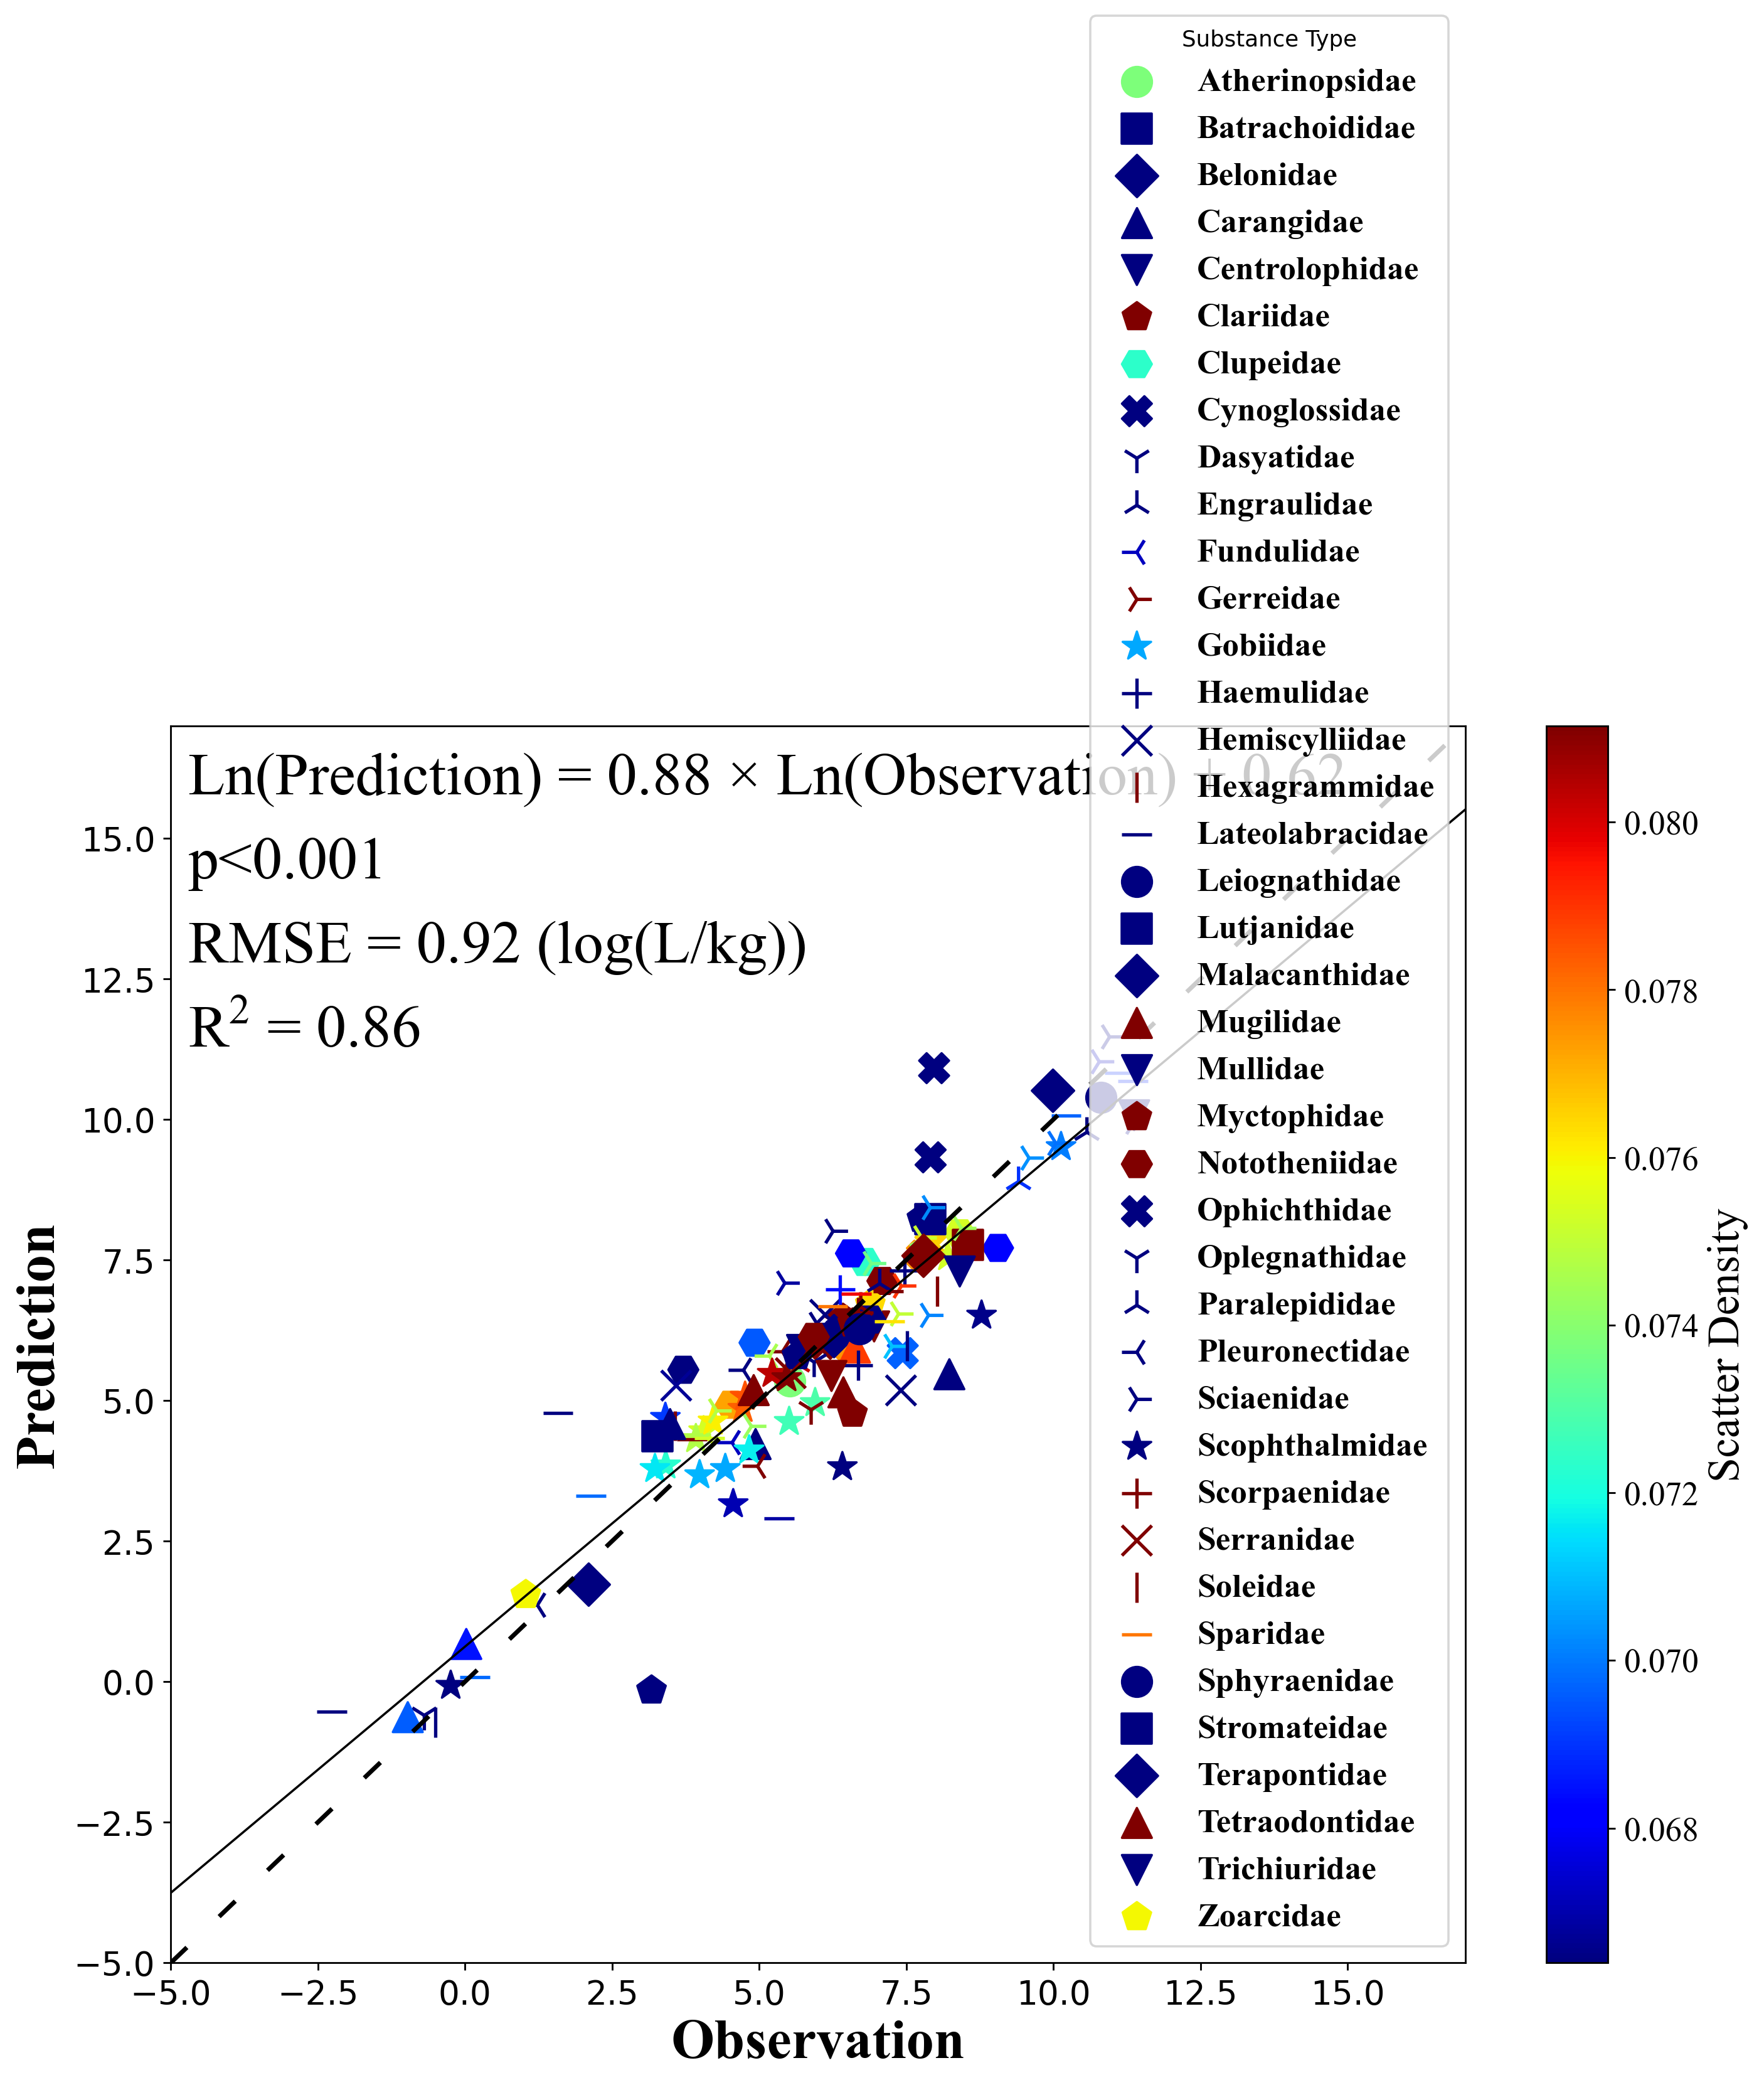

In [6]:
# Example usage:
x = results['y_test']
y = results['y_pred']
plot_regression(x, y,results['chem_cls_test'],title='\n\n')

In [ ]:
from BAFmodel import model_cal
model = model_cal()
rf_model, all_predictions = model.build_random_forest()
all_predictions['Family'] = model.data['Family'][all_predictions['sample_index']]

C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_28588\360363938.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(
C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_28588\360363938.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_28588\360363938.py:48: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


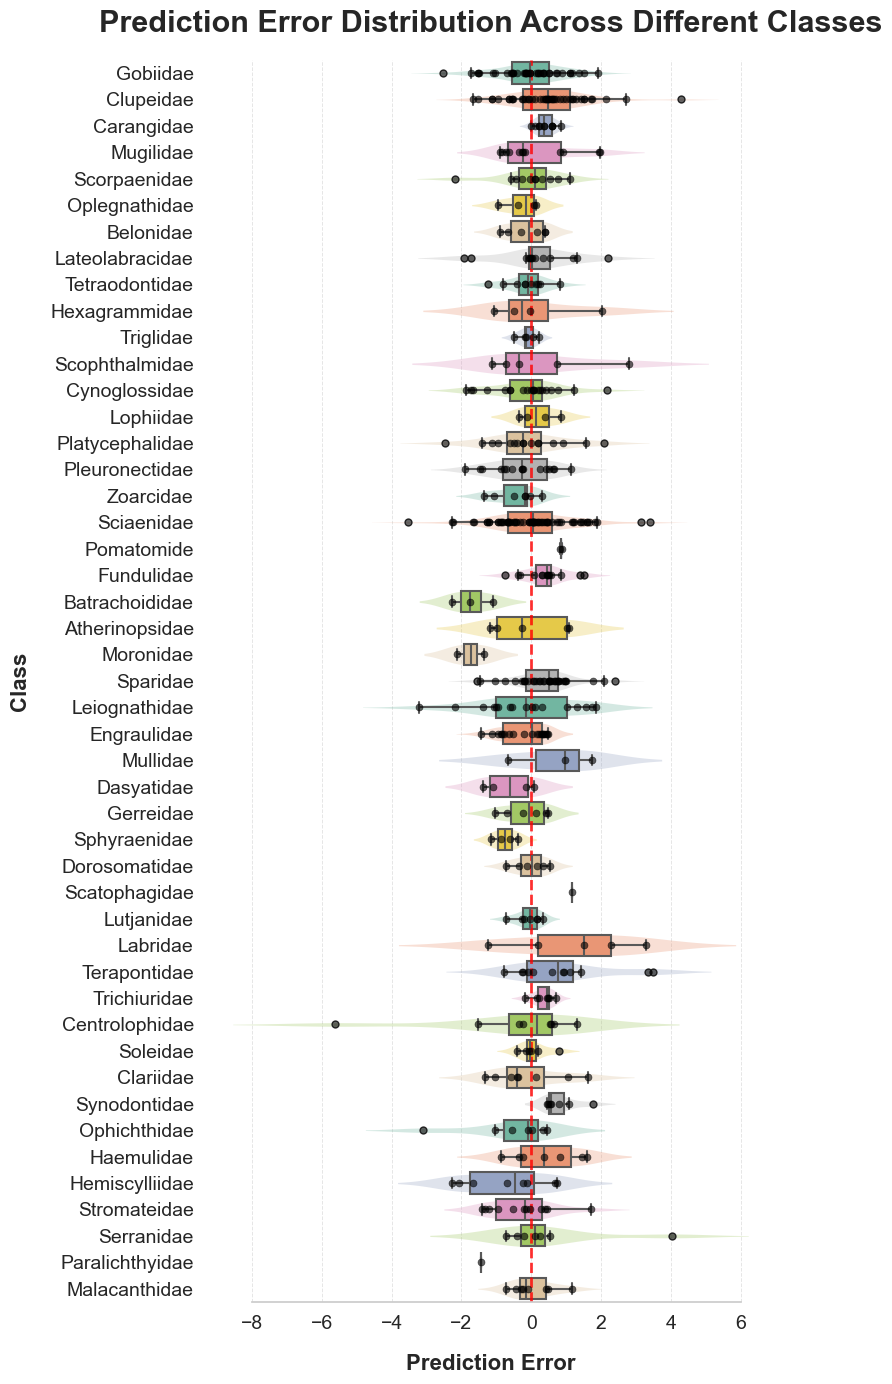

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 假设 'dic' 包含误差 ('x - y') 和类别标签 ('class') 数据
dic = {
    'error': all_predictions['predicted'] - all_predictions['true'],  # 假设 x 和 y 是您的预测值和真实值
    'class': all_predictions['Family'] # 'chem_cls_test' 是您的类别数据
}

# 将 dic 转换为 Pandas DataFrame
df = pd.DataFrame(dic)

# 设置 Seaborn 主题以匹配学术风格
sns.set_theme(
    style="whitegrid",  # 清晰的白色背景和网格线
    context="notebook",  # 适合学术论文的上下文
    palette="deep"  # 深色调的调色板，颜色对比度高
)

# 设置全局字体和数学字体，以提高可读性
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']  # 选择清晰易读的字体
mpl.rcParams['mathtext.fontset'] = 'cm'  # 使用 Computer Modern 字体

# 创建图形和轴
plt.figure(figsize=(8, 14))  # 更大的图形尺寸以增强可读性

# 绘制箱线图
box = sns.boxplot(
    y='class', x='error', data=df,
    palette="Set2",  # 使用更柔和的调色板
    linewidth=1.5,  # 细线条
    fliersize=5,  # 调整异常值点的大小
    showfliers=True  # 显示异常值
)

# 在箱线图上叠加小提琴图以展示分布
sns.violinplot(
    y='class', x='error', data=df,
    palette="Set2",
    alpha=0.3,
    linewidth=0
)

# 叠加散点图以显示个体数据点
sns.stripplot(
    y='class', x='error', data=df,
    color='black', alpha=0.6, jitter=False,
    size=5, edgecolor='gray', linewidth=0.5
)

plt.axvline(x=0, color='red', linestyle='--', linewidth=2,alpha = 0.8)  # 画一条红色的虚线

# 添加标题和轴标签
plt.title('Prediction Error Distribution Across Different Classes', fontsize=22, weight='bold', pad=20)
plt.xlabel('Prediction Error', fontsize=16, weight='bold', labelpad=15)
plt.ylabel('Class', fontsize=16, weight='bold', labelpad=15)

# 调整刻度参数
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 添加网格线，仅在 x 轴
plt.grid(True, axis='x', linestyle='--', linewidth=0.7, alpha=0.5)

# 去除顶部和右侧的边框以简化图表
sns.despine(trim=True, left=True)

# 优化布局以防止标签重叠
plt.tight_layout()

# 保存图表为高分辨率的 PNG 文件
plt.savefig('box_with_points_improved_academic.png', dpi=600, bbox_inches='tight')

# 显示图表
plt.show()


Family 'nan' has less than 3 data points. Skipping normality test.
Family 'Pomatomide' has less than 3 data points. Skipping normality test.
Family 'Moronidae' has less than 3 data points. Skipping normality test.
Family 'Scatophagidae' has less than 3 data points. Skipping normality test.
Family 'Paralichthyidae' has less than 3 data points. Skipping normality test.


C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_28588\992226807.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(
C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_28588\992226807.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_28588\992226807.py:71: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


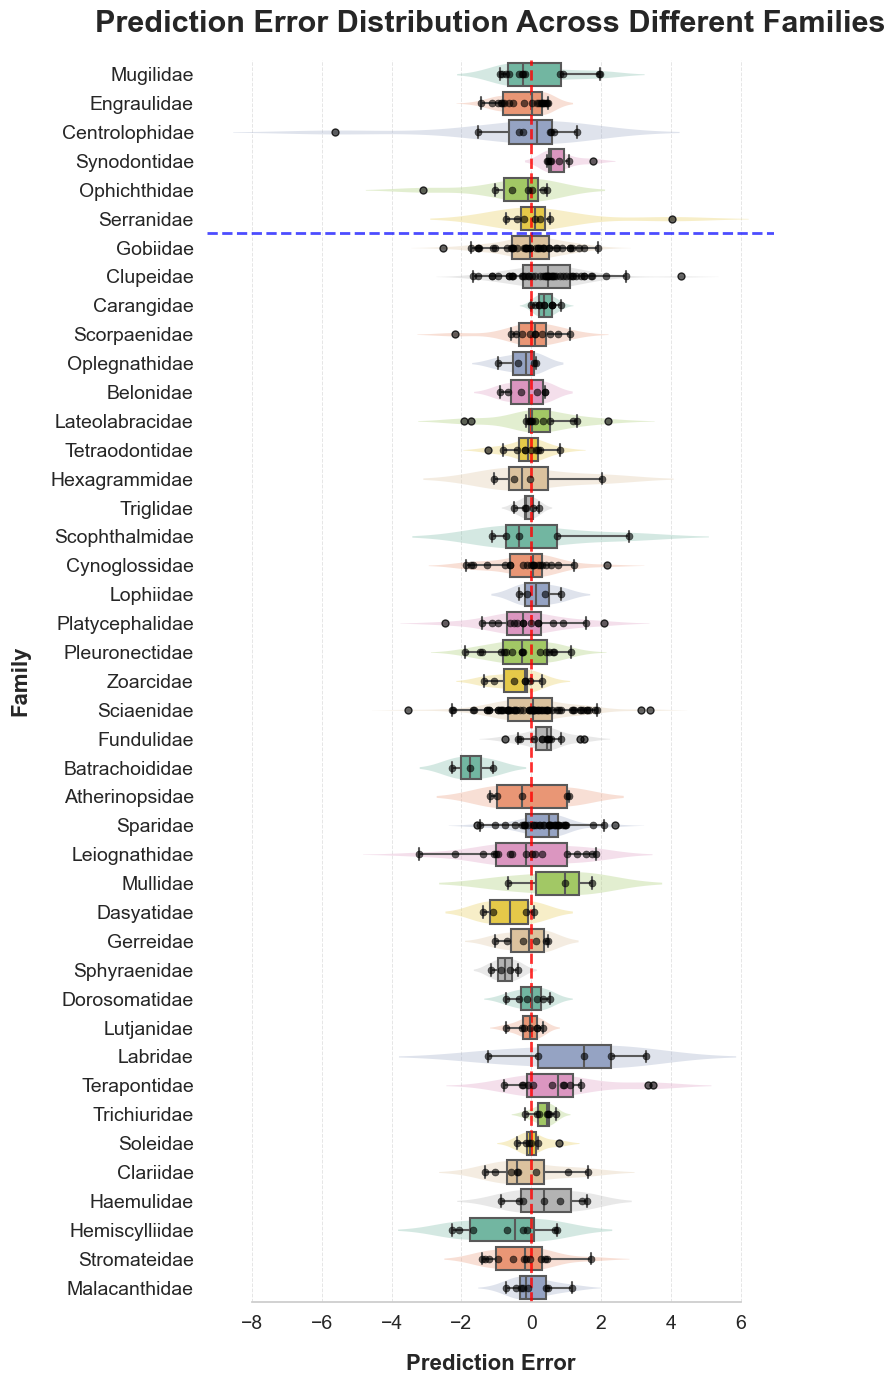

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import shapiro

# 假设 'dic' 包含误差 ('x - y') 和类别标签 ('class') 数据
dic = {
    'error': all_predictions['predicted'] - all_predictions['true'],  # 假设 x 和 y 是您的预测值和真实值
    'class': all_predictions['Family'] # 'chem_cls_test' 是您的类别数据
}

# 将 dic 转换为 Pandas DataFrame
df = pd.DataFrame(dic)

# 进行 Shapiro-Wilk 正态性检验
p_values = {}
for family in df['class'].unique():
    family_errors = df[df['class'] == family]['error']
    
    # 如果该 family 的数据量小于 3，跳过
    if len(family_errors) < 3:
        print(f"Family '{family}' has less than 3 data points. Skipping normality test.")
        p_values[family] = None
    else:
        stat, p_value = shapiro(family_errors)
        p_values[family] = p_value

# 根据 p 值对 family 进行排序：p < 0.05 认为分布不均匀，放到上面
normal_families = [family for family, p in p_values.items() if p is not None and p >= 0.05]
non_normal_families = [family for family, p in p_values.items() if p is not None and p < 0.05]

# 合并两组，非正态分布的在前
ordered_families = non_normal_families + normal_families

# 设置 Seaborn 主题以匹配学术风格
sns.set_theme(
    style="whitegrid",  # 清晰的白色背景和网格线
    context="notebook",  # 适合学术论文的上下文
    palette="deep"  # 深色调的调色板，颜色对比度高
)

# 设置全局字体和数学字体，以提高可读性
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']  # 选择清晰易读的字体
mpl.rcParams['mathtext.fontset'] = 'cm'  # 使用 Computer Modern 字体

# 创建图形和轴
plt.figure(figsize=(8, 14))  # 更大的图形尺寸以增强可读性

# 绘制箱线图
box = sns.boxplot(
    y='class', x='error', data=df,
    palette="Set2",  # 使用更柔和的调色板
    linewidth=1.5,  # 细线条
    fliersize=5,  # 调整异常值点的大小
    showfliers=True,  # 显示异常值
    order=ordered_families  # 按照正态性检验结果排序
)

# 在箱线图上叠加小提琴图以展示分布
sns.violinplot(
    y='class', x='error', data=df,
    palette="Set2",
    alpha=0.3,
    linewidth=0,
    order=ordered_families  # 保持相同排序
)

# 叠加散点图以显示个体数据点
sns.stripplot(
    y='class', x='error', data=df,
    color='black', alpha=0.6, jitter=False,
    size=5, edgecolor='gray', linewidth=0.5,
    order=ordered_families  # 保持相同排序
)

# 画一条红色的虚线表示 0
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.8)

# 绘制横线区分分布不均匀和均匀的群体
# 如果 "non_normal_families" 不为空，画一条横线在分布不均的最后一个位置
if non_normal_families:
    last_non_normal_family = non_normal_families[-1]
    plt.axhline(y=ordered_families.index(last_non_normal_family) + 0.5, color='blue', linestyle='--', linewidth=2, alpha=0.7)

# 添加标题和轴标签
plt.title('Prediction Error Distribution Across Different Families', fontsize=22, weight='bold', pad=20)
plt.xlabel('Prediction Error', fontsize=16, weight='bold', labelpad=15)
plt.ylabel('Family', fontsize=16, weight='bold', labelpad=15)

# 调整刻度参数
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 添加网格线，仅在 x 轴
plt.grid(True, axis='x', linestyle='--', linewidth=0.7, alpha=0.5)

# 去除顶部和右侧的边框以简化图表
sns.despine(trim=True, left=True)

# 优化布局以防止标签重叠
plt.tight_layout()

# 保存图表为高分辨率的 PNG 文件
plt.savefig('box_with_points_improved_academic_shapiro_with_line.png', dpi=600, bbox_inches='tight')

# 显示图表
plt.show()


In [25]:
# Example usage:
x = results['y_train']
y = results['y_train_pre']
# plot_regression(x, y,title='\ntrain\n')

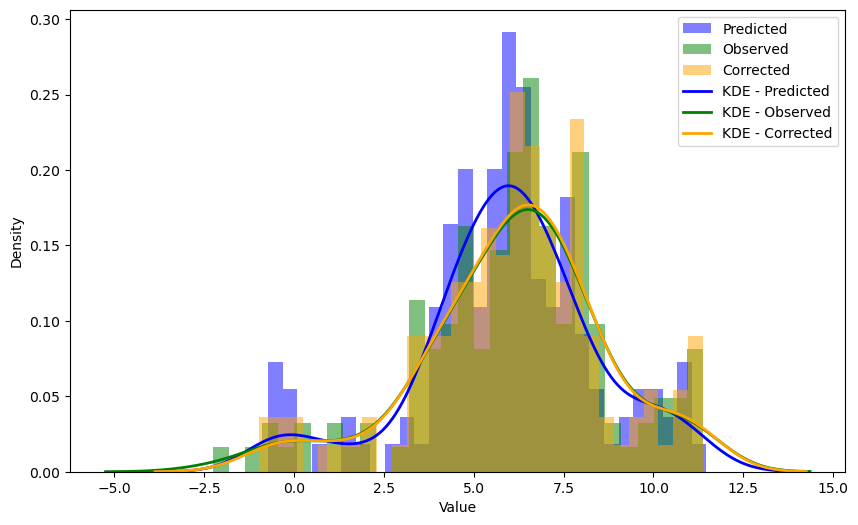

In [26]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
predicted = results['y_pred']
observed = results['y_test']

# 计算经验分布函数（ECDF）
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x_pred, y_pred = ecdf(predicted)
x_obs, y_obs = ecdf(observed)

# 分布映射（经验分布匹配）
def empirical_distribution_matching(predicted, observed):
    # 分位数计算
    ecdf_pred = stats.rankdata(predicted, method="max") / len(predicted)
    # 分位数映射到观测值的反经验分布
    observed_sorted = np.sort(observed)
    corrected = np.interp(ecdf_pred, np.linspace(0, 1, len(observed_sorted)), observed_sorted)
    return corrected

corrected = empirical_distribution_matching(predicted, observed)

# 绘图比较
plt.figure(figsize=(10, 6))

# 绘制柱状图
plt.hist(predicted, bins=30, alpha=0.5, label="Predicted", density=True, color='blue')
plt.hist(observed, bins=30, alpha=0.5, label="Observed", density=True, color='green')
plt.hist(corrected, bins=30, alpha=0.5, label="Corrected", density=True, color='orange')

# 绘制核密度估计（KDE）
sns.kdeplot(predicted, color='blue', linestyle='-', label='KDE - Predicted', linewidth=2)
sns.kdeplot(observed, color='green', linestyle='-', label='KDE - Observed', linewidth=2)
sns.kdeplot(corrected, color='orange', linestyle='-', label='KDE - Corrected', linewidth=2)

# 添加标签和标题
plt.legend()
# plt.title("Empirical Distribution Matching with KDE")
plt.xlabel("Value")
plt.ylabel("Density")

# 显示图形
plt.show()


C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_36180\3532345842.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1]
C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_36180\3532345842.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = results.params[0]
C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_36180\3532345842.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1] 

(<Figure size 3328x2560 with 2 Axes>,
 <Axes: title={'center': '\nTest (corrected)\n'}, xlabel='Observation', ylabel='Prediction'>)

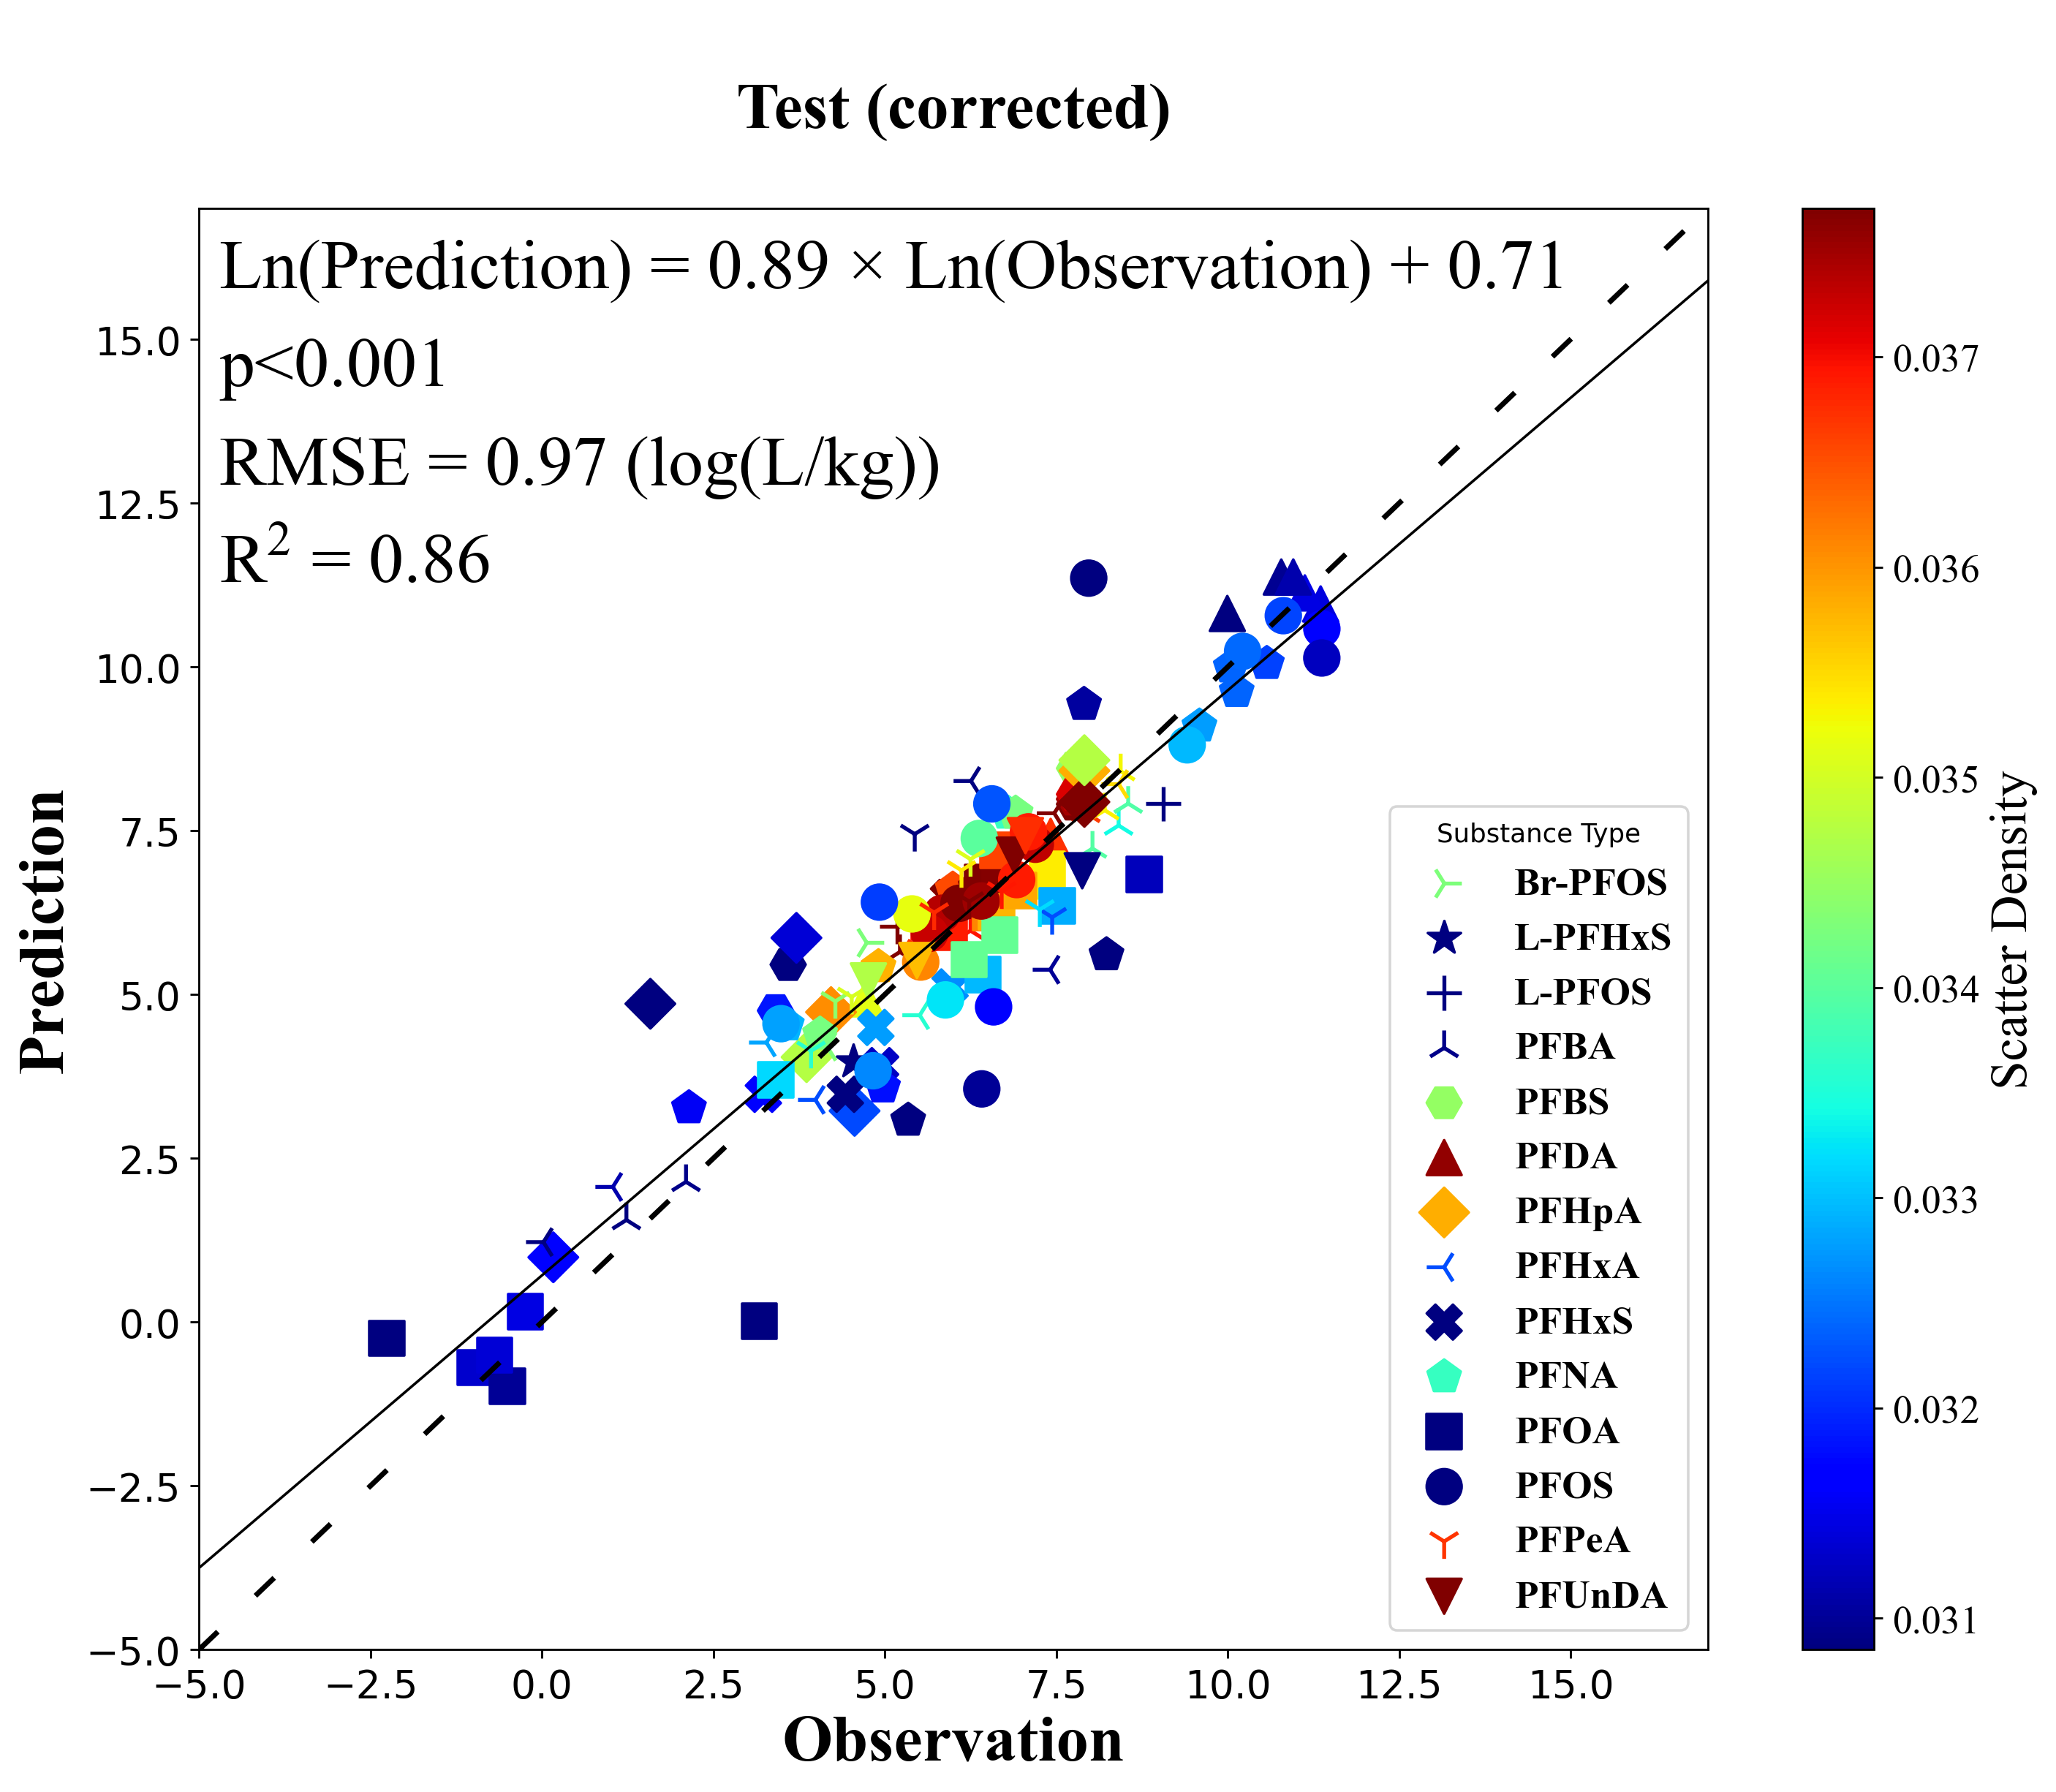

In [45]:
# Example usage:
plot_regression(observed, corrected,results['chem_cls_test'],title='\nTest (corrected)\n')

In [14]:
import pandas as pd
import numpy as np
df= pd.read_csv('BAFdata\BAF_NEW_DATA_preBAF.csv',index_col=0)
def reln(x):
    return  np.e**x
df['conf_interval_upper'] = df['conf_interval_upper'].apply(reln)
df['conf_interval_lower'] = df['conf_interval_lower'].apply(reln)

<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Yuzhe Li\AppData\Local\Temp\ipykernel_29476\3503159236.py:3: SyntaxWarning: invalid escape sequence '\B'
  df= pd.read_csv('BAFdata\BAF_NEW_DATA_preBAF.csv',index_col=0)


In [15]:
df.head()


,lat,lon,scientific_name,fishing_entity,total_tonnes,kg,commercial_group,year,SOVEREIGN,TL,...,T_C,method,Abbreviation,Kow,Groups,Length,Con,pre_LNBAF,conf_interval_lower,conf_interval_upper
0,-47,146,Acanthocybium solandri,Australia,0.025405,25.404514,Perch-likes,2019,Australia,4.3,...,11.372,BYIDW,PFBS,1.82,PFSAs,4,0.012026,8.310560,2758.129998,5995.785531
1,-47,146,Alopias vulpinus,Australia,0.009291,9.291063,Sharks & rays,2019,Australia,4.5,...,11.372,BYIDW,PFBS,1.82,PFSAs,4,0.012026,8.310596,2758.158647,5996.153818
2,-47,146,Argyrops spinifer,Australia,0.042061,42.060727,Perch-likes,2019,Australia,4.1,...,11.372,BYIDW,PFBS,1.82,PFSAs,4,0.012026,8.470600,3174.803776,7173.857688
3,-47,146,Auxis rochei,Australia,0.000007,0.006788,Tuna & billfishes,2019,Australia,4.4,...,11.372,BYIDW,PFBS,1.82,PFSAs,4,0.012026,8.310560,2758.129998,5995.785531
4,-47,146,Auxis thazard,Australia,0.006591,6.590889,Tuna & billfishes,2019,Australia,4.4,...,11.372,BYIDW,PFBS,1.82,PFSAs,4,0.012026,8.310560,2758.129998,5995.785531


In [16]:
import pandas as pd

# 计算差值
df['conf_interval_diff'] = df['conf_interval_upper'] - df['conf_interval_lower']

# 找到差值最大的行的索引
max_diff_index = df['conf_interval_diff'].idxmax()

# 获取最大差值所在的上下限值
max_diff_row = df.loc[max_diff_index]

# 打印结果
print("最大差值对应的上下限值：")
print("conf_interval_upper:", max_diff_row['conf_interval_upper'])
print("conf_interval_lower:", max_diff_row['conf_interval_lower'])


最大差值对应的上下限值：
conf_interval_upper: 129297.42166602002
conf_interval_lower: 75724.288107991


In [13]:
df['conf_interval_diff'].mean()

0.6327821360114397